In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
apple_data = pd.read_csv("Data/AAPL.csv")

In [4]:
apple_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [5]:
apple_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900
10467,2022-06-17,130.070007,133.080002,129.809998,131.559998,131.559998,134118500


In [6]:
apple_data.shape

(10468, 7)

In [7]:
apple_data.all().isna()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [8]:
apple_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [9]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [10]:
stock_open = apple_data.iloc[:,1:2].values

(array([0.04224981, 0.0058705 , 0.00285677, 0.00077959, 0.00042904,
        0.00014127, 0.0007482 , 0.00070111, 0.00059124, 0.00040288]),
 array([4.96650000e-02, 1.83076990e+01, 3.65657330e+01, 5.48237670e+01,
        7.30818010e+01, 9.13398350e+01, 1.09597869e+02, 1.27855903e+02,
        1.46113937e+02, 1.64371971e+02, 1.82630005e+02]),
 <BarContainer object of 10 artists>)

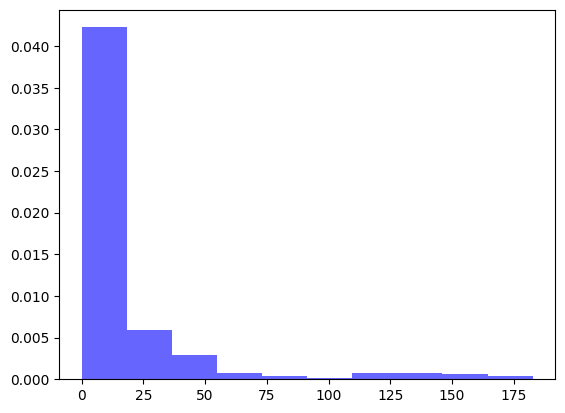

In [11]:
plt.hist(stock_open,density=True, alpha=0.6, color='b')

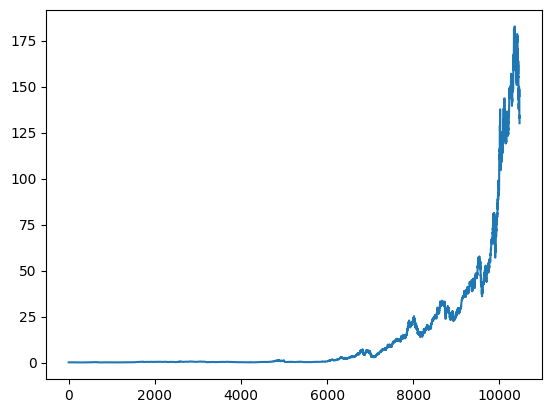

In [12]:
plt.plot(stock_open)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_stock_open = scaler.fit_transform(stock_open)

In [14]:
scaled_stock_open

array([[4.30950014e-04],
       [3.97331936e-04],
       [3.48427437e-04],
       ...,
       [7.35239774e-01],
       [7.23135563e-01],
       [7.12126738e-01]])

In [15]:
print('Mean : ',scaled_stock_open.mean(axis=0))

Mean :  [0.08055808]


In [16]:
print('Standard deviation : ',scaled_stock_open.std(axis=0))

Standard deviation :  [0.17478689]


In [17]:
apple_data.shape

(10468, 7)

In [18]:
X_train = []
y_train = []
for i in range(60,10408):
    X_train.append(scaled_stock_open[i-60:i,0])
    y_train.append(scaled_stock_open[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

The above code converts a 1-D array into a 3-D array with dimensions {batch_size, sequence_length} as the LSTM model expects the data to be in the shape of {batch_size, sequence_length, num_features}. num_features is set to one in the next code cells.

In [19]:
print(X_train.shape)
print(y_train.shape)

(10348, 60)
(10348,)


In [20]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)

(10348, 60, 1)


Building the LSTM model

In [21]:
from keras.models import Sequential 
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [22]:
#Defining the model 
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))